<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Outliers**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis or EDA. 
You will explore the distribution of key variables and focus on identifying outliers in this lab.


## Objectives


In this lab, you will perform the following:


-  Analyze the distribution of key variables in the dataset.

-  Identify and remove outliers using statistical methods.

-  Perform relevant statistical and correlation analysis.


#### Install and import the required libraries


In [9]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install numpy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h3>Step 1: Load and Explore the Dataset</h3>


Load the dataset into a DataFrame and examine the structure of the data.


In [31]:
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

#Create the dataframe
df = pd.read_csv(file_url)

#Display the top 10 records
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 2: Plot the Distribution of Industry</h3>


Explore how respondents are distributed across different industries.

- Plot a bar chart to visualize the distribution of respondents by industry.

- Highlight any notable trends.

<Axes: xlabel='count', ylabel='Industry'>

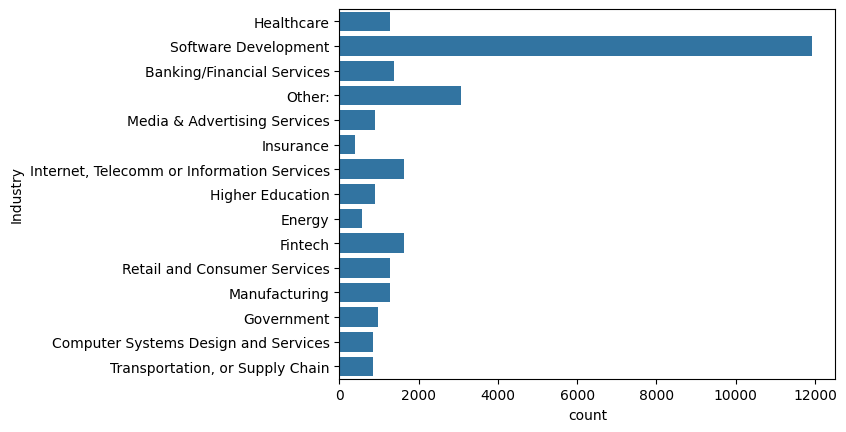

In [6]:
sns.countplot(data = df['Industry'])

# Massive focus on Software Development, very few people working in insurance or energy, but
# in general the data is evenly-distributed.

<h3>Step 3: Identify High Compensation Outliers</h3>


Identify respondents with extremely high yearly compensation.

- Calculate basic statistics (mean, median, and standard deviation) for `ConvertedCompYearly`.

- Identify compensation values exceeding a defined threshold (e.g., 3 standard deviations above the mean).


In [11]:
stats = df['ConvertedCompYearly'].describe()

# Calculate mean and standard deviation
mean = np.mean(df['ConvertedCompYearly'])
std_dev = np.std(df['ConvertedCompYearly'])

# Define the threshold (e.g., 3 standard deviations above the mean)
threshold = mean + 3 * std_dev

# Identify values exceeding the threshold
exceeding_values = [value for value in df['ConvertedCompYearly'] if value > threshold]

print(f"Mean: {mean}")
print(f"Standard Deviation: {std_dev}")
print(f"Threshold: {threshold}")
print(f"Compensation values exceeding the threshold: {exceeding_values}")

Mean: 86155.28726264134
Standard Deviation: 186752.98847000962
Threshold: 646414.2526726702
Compensation values exceeding the threshold: [650000.0, 1000000.0, 945000.0, 750000.0, 2000000.0, 1000000.0, 800000.0, 1302817.0, 1031099.0, 650000.0, 750000.0, 1052581.0, 1728025.0, 1074062.0, 1500000.0, 950000.0, 1184707.0, 798000.0, 1188001.0, 1000000.0, 1273879.0, 1332930.0, 13818022.0, 700000.0, 660660.0, 1000000.0, 803285.0, 1500000.0, 2048046.0, 670000.0, 859250.0, 1750749.0, 750000.0, 740517.0, 750000.0, 16256603.0, 1550391.0, 800000.0, 700000.0, 6340564.0, 4936778.0, 1000000.0, 1200000.0, 875000.0, 750000.0, 1200000.0, 3367716.0, 750000.0, 1562898.0, 750000.0, 2014062.0, 750000.0, 713372.0, 2584118.0, 750000.0, 700000.0, 764327.0, 1250348.0, 912953.0, 810000.0, 750000.0, 1295242.0, 2000000.0, 650000.0, 1200000.0, 9000000.0, 650000.0, 980887.0, 850000.0, 720000.0, 675000.0, 1750000.0, 712801.0, 1074062.0, 2237846.0, 1200000.0, 1500000.0, 2153432.0, 1188001.0, 1140481.0, 1900000.0, 128887

<h3>Step 4: Detect Outliers in Compensation</h3>


Identify outliers in the `ConvertedCompYearly` column using the IQR method.

- Calculate the Interquartile Range (IQR).

- Determine the upper and lower bounds for outliers.

- Count and visualize outliers using a box plot.


Q1: 32712.0
Q3: 107971.5
IQR: 75259.5
Lower Bound: -80177.25
Upper Bound: 220860.75
Number of Outliers: 978


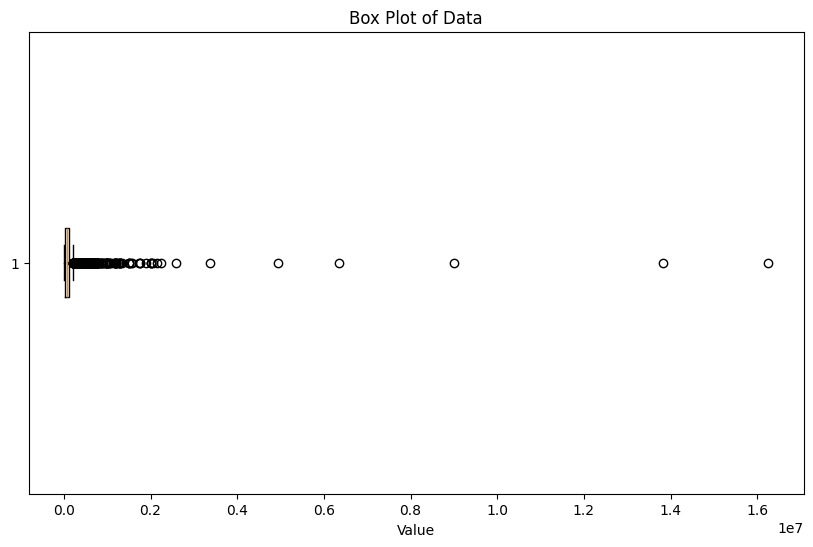

In [18]:

df_cleaned = df.dropna(subset=['ConvertedCompYearly'])

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df_cleaned['ConvertedCompYearly'].quantile(0.25)
Q3 = df_cleaned['ConvertedCompYearly'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Determine the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count the outliers
outliers = df['ConvertedCompYearly'][(df['ConvertedCompYearly'] < lower_bound) | (df['ConvertedCompYearly'] > upper_bound)]
outlier_count = outliers.count()

# Print the results
print(f"Q1: {Q1}")
print(f"Q3: {Q3}")
print(f"IQR: {IQR}")
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")
print(f"Number of Outliers: {outlier_count}")

# Visualize the data using a box plot
plt.figure(figsize=(10, 6))
plt.boxplot(df_cleaned['ConvertedCompYearly'], vert=False)
plt.title('Box Plot of Data')
plt.xlabel('Value')
plt.show()

<h3>Step 5: Remove Outliers and Create a New DataFrame</h3>


Remove outliers from the dataset.

- Create a new DataFrame excluding rows with outliers in `ConvertedCompYearly`.
- Validate the size of the new DataFrame.


In [25]:
new_df = df_cleaned[~df_cleaned['ConvertedCompYearly'].isin(outliers)]
new_df.shape

(22457, 114)

<h3>Step 6: Correlation Analysis</h3>


Analyze the correlation between `Age` (transformed) and other numerical columns.

- Map the `Age` column to approximate numeric values.

- Compute correlations between `Age` and other numeric variables.

- Visualize the correlation matrix.


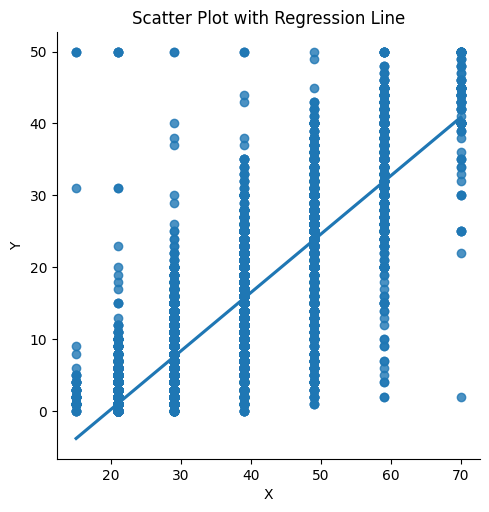

In [36]:
# Sample DataFrame

# Mapping of strings to numeric values
mapping = {
    'Under 18 years old': 15,
    '35-44 years old': 39,
    '45-54 years old': 49,
    '18-24 years old': 21,
    '25-34 years old': 29,
    '55-64 years old': 59,
    '65 years or older': 70,
}

# Creating a new column with numeric values
df['Age_Numeric'] = df['Age'].map(mapping)

# Select only the float type columns
float_df = df.select_dtypes(include=['float64'])

# Assuming df is your DataFrame and 'target_column' is the column of interest
target_column = 'Age_Numeric'

# Calculate the correlation matrix
correlation_matrix = float_df.corr()

# Extract the correlations of the target column with all other columns
target_correlations = correlation_matrix[[target_column]].sort_values(by=target_column, ascending=False)

# Create scatter plot with regression line
sns.lmplot(x='Age_Numeric', y='WorkExp', data=float_df)
plt.title('Scatter Plot with Regression Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


<h3> Summary </h3>


In this lab, you developed essential skills in **Exploratory Data Analysis (EDA)** with a focus on outlier detection and removal. Specifically, you:


- Loaded and explored the dataset to understand its structure.

- Analyzed the distribution of respondents across industries.

- Identified and removed high compensation outliers using statistical thresholds and the Interquartile Range (IQR) method.

- Performed correlation analysis, including transforming the `Age` column into numeric values for better analysis.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-1|1.1|Madhusudan Moole|Reviewed and updated lab|                                                                                    
|2024-09-29|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
